## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Look at 'EIN' value counts 
application_df['EIN'].value_counts()

10520599     1
626274659    1
630475330    1
630416100    1
630357662    1
            ..
383880377    1
383876652    1
383874900    1
383871370    1
996086871    1
Name: EIN, Length: 34299, dtype: int64

In [3]:
# Look at 'NAME' value counts 
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [4]:
# Look at 'NAME' value counts >50
name_greater_1 = application_df['NAME'].value_counts(ascending=False).loc[lambda x : x>50]
name_greater_1

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [5]:
# Drop the non-beneficial ID column 'EIN'.
application_df = application_df.drop(columns=["EIN"])

In [6]:
# Choose a cutoff value and create a list of name types to be replaced
# use the variable name `name_types_to_replace`
name_counts = application_df['NAME'].value_counts()
name_types_to_replace = list(name_counts[name_counts < 206].index)

# Replace in dataframe
for app in name_types_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 28123
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [7]:
# # Choose a cutoff value and create a list of application types to be replaced
# # use the variable name `application_types_to_replace`
# application_counts = application_df['APPLICATION_TYPE'].value_counts()
# application_types_to_replace = list(application_counts[application_counts < 3].index)

# # Replace in dataframe
# for app in application_types_to_replace:
#     application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
# application_df['APPLICATION_TYPE'].value_counts()

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = list(classification_counts[classification_counts < 116].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other      887
C7000      777
C1700      287
C4000      194
C5000      116
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable lists
categorical_list = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
categorical_list

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [10]:
# Check the number of unique values in each column
application_df[categorical_list].nunique()

NAME                      15
APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            10
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
categorical_encoded_df = pd.DataFrame(enc.fit_transform(application_df[categorical_list]))

# Add the encoded variable names to the dataframe
categorical_encoded_df.columns = enc.get_feature_names_out(categorical_list)
categorical_encoded_df.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(categorical_encoded_df,left_index=True, right_index=True)
application_df = application_df.drop(categorical_list,1)
application_df.head()

<ipython-input-12-0997609a1bee>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(categorical_list,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Drop the column 'SPECIAL_CONSIDERATIONS_N' column as values also in 'SPECIAL_CONSIDERATIONS_Y' column
application_df = application_df.drop(columns=['SPECIAL_CONSIDERATIONS_N'])
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
application_df["IS_SUCCESSFUL"].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [15]:
application_df["SPECIAL_CONSIDERATIONS_Y"].value_counts()

0.0    34272
1.0       27
Name: SPECIAL_CONSIDERATIONS_Y, dtype: int64

In [16]:
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [17]:
# Split our preprocessed data into our features and target arrays
y= application_df['IS_SUCCESSFUL'].values
X= application_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [19]:
# # Create a method that creates a new Sequential model with hyperparameter options
# def create_model(hp):
#     funding_model = tf.keras.models.Sequential()

#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
#     # Allow kerastuner to decide number of neurons in first layer
#     funding_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=1,
#         max_value=10,
#         step=2), activation=activation, input_dim=len(X_train[0])))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 6)):
#         funding_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=1,
#             max_value=10,
#             step=2),
#             activation=activation))
    
#     funding_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     funding_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
#     return funding_model

In [20]:
# # Import the kerastuner library
# import keras_tuner as kt

# tuner = kt.Hyperband(
#     create_model,
#     objective="val_accuracy",
#     max_epochs=20,
#     hyperband_iterations=2)

In [21]:
# # Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [22]:
# # Get best model hyperparameters
# best_hyper = tuner.get_best_hyperparameters(1)[0]
# best_hyper.values

In [23]:
# # Evaluate best model against full test data
# best_model = tuner.get_best_models(1)[0]
# model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [24]:
len(X_train[0])

69

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  130
hidden_nodes_layer2 = 55
# hidden_nodes_layer3 = 58

funding_model = tf.keras.models.Sequential()

# First hidden layer
# Add our first Dense layer, including the input layer
funding_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
# funding_model.add(tf.keras.layers.Dropout(rate=0.1, seed=2))
funding_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
# funding_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
# Add the output layer that uses a probability activation function
funding_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
funding_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 130)               9100      
                                                                 
 dense_1 (Dense)             (None, 55)                7205      
                                                                 
 dense_2 (Dense)             (None, 1)                 56        
                                                                 
Total params: 16,361
Trainable params: 16,361
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
# funding_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.experimental.AdamW(
#     learning_rate = 0.01,
#     name = "AdamW"
# ), metrics=["accuracy"])
funding_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
fit_funding_model = funding_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5298 - accuracy: 0.7355
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5106 - accuracy: 0.7479
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5059 - accuracy: 0.7509
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5028 - accuracy: 0.7551
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5014 - accuracy: 0.7531
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4998 - accuracy: 0.7543
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4978 - accuracy: 0.7552
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4978 - accuracy: 0.7540
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4965 - accuracy: 0.7552
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4959 - accura

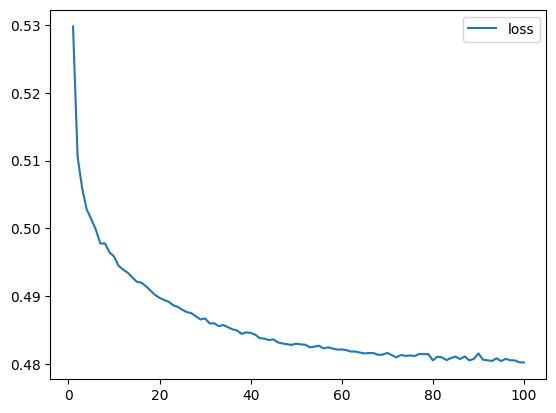

In [28]:
# Create a DataFrame containing training history
funding_model_history_df = pd.DataFrame(fit_funding_model.history)

# Increase the index by 1 to match the number of epochs
funding_model_history_df.index += 1

# Plot the loss
funding_model_history_df.plot(y="loss")
plt.show()

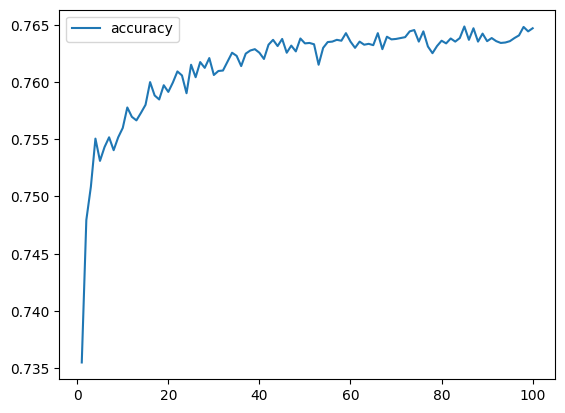

In [29]:
# Plot the accuracy
funding_model_history_df.plot(y="accuracy")
plt.show()

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = funding_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5153 - accuracy: 0.7492 - 468ms/epoch - 2ms/step
Loss: 0.5152865052223206, Accuracy: 0.7491545081138611


In [31]:
# Export our model to HDF5 file
# funding_model.save('Desktop/deep-learning-challenge/AlphabetSoupCharity_Optimisation.h5')
# nn = keras.models.load_model('Desktop/deep-learning-challenge')